In [ ]:
#!pip install tensorflow==2.2.0
#!pip install keras==2.3.1

In [1]:
import numpy as np
import tensorflow as tf
import random as rn
import keras, sklearn
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
print(tf.__version__)

2.2.0


In [3]:
print(keras.__version__)

2.3.1



### 신경망 구축 방법
""" <br>
단계 1: 데이터 로드 및 처리 <br>
단계 2: 모델과 아키텍처를 정의 <br>
단계 3: 최적화 도구 및 함수 선택 <br>
단계 4: 모델 학습 <br>
단계 5: 모델 성능 평가 <br>
단계 6: 성능 최적화 <br>
"""


### A real example — recognizing handwritten digits(손글씨) 
""" <br>
우리는 손으로 쓴 숫자를 인식할 수 있는 네트워크를 구축할 것이다.
이 목표를 달성하기 위해, 우리는 60,000개의 예와 10,000개의 예제의 훈련 세트로 구성된 손으로 쓴 숫자의 데이터베이스인 MNIST를 사용한다.
교육 예에는 정답이 적힌 주석이 달려 있다.
예를 들어 손으로 쓴 숫자가 숫자 3이면 숫자 3은 해당 예제와 연관된 레이블일 뿐입니다.
각 MNIST 영상은 그레이 스케일로 구성되며 28 x 28픽셀로 구성됩니다.
다음 다이어그램에는 이러한 숫자들이 나와 있습니다. <br>
"""

"""
아래 6개의 서로 다른 신경망을 구축하고 그 성능을 비교합니다. <br>

Case #1: Defining a simple neural net in Keras <br>
Case #2: Improving the simple net in Keras with hidden layers <br>
Case #3: Further improving the simple net in Keras with dropout <br>
Case #4: Testing different optimizers in Keras <br>
Case #5: Adopting regularization for avoiding overfitting <br>
Case #6: Optimizing hyperparameters with Keras-scikit-wrapper <br>
"""

## Case #1: Defining a simple neural net in Keras

### Step 1: Load and Process the Data

In [5]:
# mnist 이미지 데이터
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784 # 전체 픽셀 갯수

X_train = X_train.reshape(60000, RESHAPED) # 학습이미지 6만개
X_test = X_test.reshape(10000, RESHAPED) # 평가이미지 만개
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 한 픽셀 값은 0~255로 표현된다. 0은 흰색, 255는 검은색

# normalize
X_train /= 255 
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
# 뉴럴넷은 입력데이터에 대한 스케일 조정이 필요
# to_categorical : 찾을 값이 0~9까지이므로 10개로 원핫 인코딩을 한다.
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

11493376/11490434 [==============================] - 7s 1us/step
60000 train samples
10000 test samples


### Step 2: Define the Model & its Architecture

In [6]:
# 10 outputs
# final stage is softmax
model = Sequential()

# Dense : 입력모드가 784(RESHAPED), 첫번째 히든레이어는 10개로 연결하라
model.add(Dense(10, input_shape=(RESHAPED,))) 
model.add(Activation('softmax'))

model.summary() # 종합한것을 본다.  
# Param 이 weight 이다. 7850개를 학습시키면 된다.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Step 3: Choose the Optimizer and the Cost function

In [7]:
# optimizer : SGD 는 최적의 방법을 찾는 것
model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])

### Step 4: Train the Model

In [8]:
%%time
# validation_split 0.2 : 80은 학습하고 20%는 평가를 위해 남겨 두겠다
# verbose : 중간 중간의 과정을 찍을 것인지 말것인지, 얼마나 자세하게 정보를 표시할 것인가를 지정. (0, 1, 2)
history = model.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1, 
                    validation_split=0.2)
# history변수에 저장한 것은 나중에 체크해보기 위함.

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 1s 11us/step - loss: 1.3622 - accuracy: 0.6811 - val_loss: 0.8830 - val_accuracy: 0.8319
Epoch 2/30
48000/48000 [==============================] - 0s 10us/step - loss: 0.7898 - accuracy: 0.8275 - val_loss: 0.6524 - val_accuracy: 0.8603
Epoch 3/30
48000/48000 [==============================] - 0s 9us/step - loss: 0.6421 - accuracy: 0.8503 - val_loss: 0.5582 - val_accuracy: 0.8733
Epoch 4/30
48000/48000 [==============================] - 0s 9us/step - loss: 0.5702 - accuracy: 0.8615 - val_loss: 0.5060 - val_accuracy: 0.8793
Epoch 5/30
48000/48000 [==============================] - 0s 9us/step - loss: 0.5263 - accuracy: 0.8678 - val_loss: 0.4724 - val_accuracy: 0.8843
Epoch 6/30
48000/48000 [==============================] - 0s 9us/step - loss: 0.4961 - accuracy: 0.8733 - val_loss: 0.4486 - val_accuracy: 0.8870
Epoch 7/30
48000/48000 [==============================] - 0s 9us/step - 

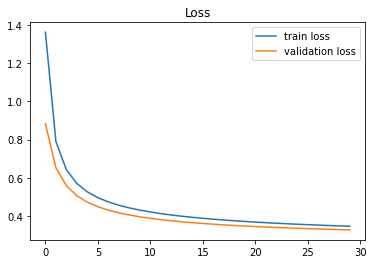

In [9]:
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.title("Loss")
plt.show()

### Step 5: Evaluate the Model performance

In [10]:
# evaluate : 전체
# 케라스는 pridict 하면 확률을 출력한다.
score = model.evaluate(X_test, Y_test, verbose=1)
print("Test score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 12us/step
Test score: 0.3260914154827595
Test accuracy: 0.9104999899864197


##### Save & Load the Model

In [11]:
from keras.models import load_model

In [12]:
# 모델 저장
model.save('mnist_dnn_01.h5')
%ls

 D 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: C64D-C287

 D:\빅데이터분석전문가\강의자료\딥러닝 디렉터리

2021-03-16  오후 03:11    <DIR>          .
2021-03-16  오후 03:11    <DIR>          ..
2021-03-16  오후 12:09    <DIR>          .ipynb_checkpoints
2021-03-16  오후 12:07           458,560 dnn_with_keras_lecture.html
2021-03-16  오후 02:51            31,290 dnn_with_keras_lecture.ipynb
2021-03-16  오후 03:11            78,480 mnist_dnn_01.h5
2021-03-16  오후 12:02         3,494,613 Neural_Networks_with_Keras.pdf
2021-03-16  오후 02:28        14,871,096 VC_redist.x64.exe
               5개 파일          18,934,039 바이트
               3개 디렉터리  137,431,891,968 바이트 남음


In [13]:
# 모델 로딩
model2 = load_model('mnist_dnn_01.h5')

## Case #2: Improving the simple net in Keras with hidden layers

### Step 2: Define the Model & its Architecture

In [14]:
model = Sequential()

# 첫번째 층
model.add(Dense(32, input_shape=(RESHAPED,)))
model.add(Activation('relu')) # 엑티베이션 함수를 relu 함수로 사용

# 두변째 층
model.add(Dense(32, activation='relu')) # 위의 두줄을 한줄로 표현
#model.add(Activation('relu'))

# 세번째 층
model.add(Dense(32))
model.add(Activation('relu'))

# 출력층
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

# 총 weight 수가 27,562개

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
activation_2 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
activation_3 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_4 (Activation)    (None, 10)               

### Step 3: Choose the Optimizer and the Cost function

In [15]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer=Adam, metrics=['accuracy'])

### Step 4: Train the Model

In [16]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1, 
                    validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 1s 12us/step - loss: 1.9816 - accuracy: 0.3262 - val_loss: 1.4749 - val_accuracy: 0.5918
Epoch 2/30
48000/48000 [==============================] - 0s 10us/step - loss: 1.0064 - accuracy: 0.7235 - val_loss: 0.6657 - val_accuracy: 0.8187
Epoch 3/30
48000/48000 [==============================] - 0s 10us/step - loss: 0.5950 - accuracy: 0.8299 - val_loss: 0.4834 - val_accuracy: 0.8662
Epoch 4/30
48000/48000 [==============================] - 1s 11us/step - loss: 0.4711 - accuracy: 0.8667 - val_loss: 0.4030 - val_accuracy: 0.8880
Epoch 5/30
48000/48000 [==============================] - 1s 11us/step - loss: 0.4061 - accuracy: 0.8864 - val_loss: 0.3580 - val_accuracy: 0.8999
Epoch 6/30
48000/48000 [==============================] - 1s 10us/step - loss: 0.3660 - accuracy: 0.8971 - val_loss: 0.3338 - val_accuracy: 0.9066
Epoch 7/30
48000/48000 [==============================] - 0s 10us/st

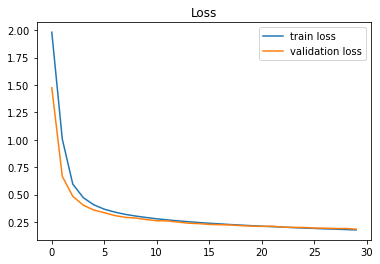

In [17]:
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.title("Loss")
plt.show()

### Step 5: Evaluate the Model performance

In [18]:
score = model.evaluate(X_test, Y_test, verbose=1)
print("Test score:", score[0])
print('Test accuracy:', score[1])

model.save('mnist_dnn_02.h5')

10000/10000 [==============================] - 0s 13us/step
Test score: 0.18451542791351677
Test accuracy: 0.9447000026702881


## Case #3: Further improving the simple net in Keras with dropout

### Step 2: Define the Model & its Architecture

In [19]:
from keras.layers.core import Dropout

# Dropout : 층별로 오버피팅을 줄일 수 있도록 지정할 수 있다.
model = Sequential()

model.add(Dense(128, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(0.2)) # Dropout 비율을 20%로 하라

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_6 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

### Step 3: Choose the Optimizer and the Cost function

In [20]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])

### Step 4: Train the Model

In [21]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1, 
                    validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 1s 20us/step - loss: 1.6017 - accuracy: 0.4956 - val_loss: 0.8498 - val_accuracy: 0.8140
Epoch 2/30
48000/48000 [==============================] - 1s 18us/step - loss: 0.8439 - accuracy: 0.7467 - val_loss: 0.5087 - val_accuracy: 0.8745
Epoch 3/30
48000/48000 [==============================] - 1s 18us/step - loss: 0.6403 - accuracy: 0.8090 - val_loss: 0.4100 - val_accuracy: 0.8913
Epoch 4/30
48000/48000 [==============================] - 1s 17us/step - loss: 0.5440 - accuracy: 0.8382 - val_loss: 0.3582 - val_accuracy: 0.9018
Epoch 5/30
48000/48000 [==============================] - 1s 16us/step - loss: 0.4863 - accuracy: 0.8586 - val_loss: 0.3280 - val_accuracy: 0.9089
Epoch 6/30
48000/48000 [==============================] - 1s 17us/step - loss: 0.4495 - accuracy: 0.8685 - val_loss: 0.3057 - val_accuracy: 0.9146
Epoch 7/30
48000/48000 [==============================] - 1s 17us/st

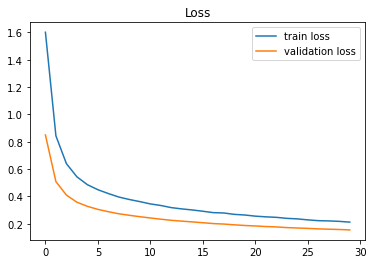

In [22]:
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.title("Loss")
plt.show()

### Step 5: Evaluate the Model performance

In [23]:
score = model.evaluate(X_test, Y_test, verbose=1)
print("Test score:", score[0])
print('Test accuracy:', score[1])

model.save('mnist_dnn_03.h5')

10000/10000 [==============================] - 0s 17us/step
Test score: 0.15048114033639431
Test accuracy: 0.9552000164985657


## Case #4: Testing different optimizers in Keras

### Step 2: Define the Model & its Architecture

In [24]:
model = Sequential()
model.add(Dense(128, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_8 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
activation_9 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

### Step 3: Choose the Optimizer and the Cost function

In [25]:
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

### Step 4: Train the Model

In [26]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1, 
                    validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 1s 24us/step - loss: 0.5077 - accuracy: 0.8491 - val_loss: 0.1904 - val_accuracy: 0.9437
Epoch 2/30
48000/48000 [==============================] - 1s 22us/step - loss: 0.2229 - accuracy: 0.9340 - val_loss: 0.1410 - val_accuracy: 0.9582
Epoch 3/30
48000/48000 [==============================] - 1s 22us/step - loss: 0.1694 - accuracy: 0.9496 - val_loss: 0.1147 - val_accuracy: 0.9655
Epoch 4/30
48000/48000 [==============================] - 1s 20us/step - loss: 0.1376 - accuracy: 0.9593 - val_loss: 0.1041 - val_accuracy: 0.9682
Epoch 5/30
48000/48000 [==============================] - 1s 20us/step - loss: 0.1197 - accuracy: 0.9638 - val_loss: 0.0963 - val_accuracy: 0.9720
Epoch 6/30
48000/48000 [==============================] - 1s 22us/step - loss: 0.1054 - accuracy: 0.9681 - val_loss: 0.0901 - val_accuracy: 0.9718
Epoch 7/30
48000/48000 [==============================] - 1s 21us/st

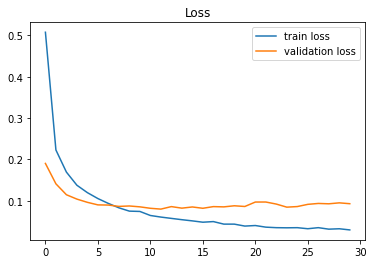

In [27]:
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.title("Loss")
plt.show()

### Step 5: Evaluate the Model performance

In [28]:
score = model.evaluate(X_test, Y_test, verbose=1)
print("Test score:", score[0])
print('Test accuracy:', score[1])

model.save('mnist_dnn_04.h5')

10000/10000 [==============================] - 0s 15us/step
Test score: 0.08819945456340929
Test accuracy: 0.9797999858856201


## Case #5: Adopting regularization for avoiding overfitting

### Step 2: Define the Model & its Architecture

In [29]:
# 오버피팅을 줄이는 방법
from keras import regularizers
from keras.constraints import max_norm
from keras.layers import BatchNormalization

model = Sequential()
#model.add(Dense(128, input_shape=(RESHAPED,), kernel_regularizer=regularizers.l2(0.01), kernel_initializer="glorot_normal"))
model.add(Dense(128, input_shape=(RESHAPED,), kernel_constraint=max_norm(2.), kernel_initializer="he_normal"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
#model.add(Dense(64, kernel_regularizer=regularizers.l2(0.01), kernel_initializer="glorot_normal"))
model.add(Dense(64, kernel_constraint=max_norm(2.), kernel_initializer="he_normal"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_11 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
activation_12 (Activation)   (None, 64)               

### Step 3: Choose the Optimizer and the Cost function

In [30]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

### Step 4: Train the Model

In [31]:
# Early stopping is basically stopping the training once your loss starts to increase.
# 학습 조기 종료를 위해 더 이상 개선의 여지가 없을 때 학습을 종료시키는 콜백함수
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=3)
# patience : 개선이 없다고 바로 종료하지 않고 개선이 없는 에포크를 얼마나 기다려 
#           줄 것인 가를 지정합니다. 
# 만약 10이라고 지정하면 개선이 없는 에포크가 10번째 지속될 경우 학습을 종료합니다.

history = model.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1, 
                    validation_split=0.2, callbacks=[early_stop])

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 2s 37us/step - loss: 0.4936 - accuracy: 0.8618 - val_loss: 0.1830 - val_accuracy: 0.9512
Epoch 2/30
48000/48000 [==============================] - 1s 29us/step - loss: 0.2195 - accuracy: 0.9364 - val_loss: 0.1399 - val_accuracy: 0.9575
Epoch 3/30
48000/48000 [==============================] - 1s 27us/step - loss: 0.1671 - accuracy: 0.9500 - val_loss: 0.1119 - val_accuracy: 0.9680
Epoch 4/30
48000/48000 [==============================] - 1s 29us/step - loss: 0.1358 - accuracy: 0.9589 - val_loss: 0.0961 - val_accuracy: 0.9718
Epoch 5/30
48000/48000 [==============================] - 1s 30us/step - loss: 0.1182 - accuracy: 0.9643 - val_loss: 0.0950 - val_accuracy: 0.9720
Epoch 6/30
48000/48000 [==============================] - 1s 30us/step - loss: 0.1039 - accuracy: 0.9674 - val_loss: 0.0886 - val_accuracy: 0.9728
Epoch 7/30
48000/48000 [==============================] - 1s 29us/st

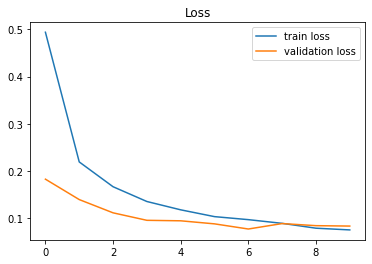

In [32]:
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.title("Loss")
plt.show()

### Step 5: Evaluate the Model performance

In [33]:
score = model.evaluate(X_test, Y_test, verbose=1)
print("Test score:", score[0])
print('Test accuracy:', score[1])

model.save('mnist_dnn_05.h5')

10000/10000 [==============================] - 0s 17us/step
Test score: 0.0769301350798225
Test accuracy: 0.9753000140190125


## Case #6: Optimizing hyperparameters with Keras-scikit-wrapper

### 1) Define a function which constructs, compiles and returns a Keras model

In [ ]:
def dnn_model(optimizer=Adam(), dropout_rate=0.0):
    # Define the model & its architecture    
    model = Sequential()
    model.add(Dense(128, input_shape=(RESHAPED,), activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))
    # Choose the optimizer and the cost function
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    # Return model           
    return model

### 2) Instantiate KerasClassifier which implements the Scikit-Learn classifier interface

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
# call Keras scikit wrapper
dnn = KerasClassifier(build_fn=dnn_model, epochs=1)

### 3) Apply scikit-learn's RandomizedSearchCV (or GridSearchCV)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Specify parameters and distributions to sample from
param_dist = {
    'dropout_rate': [0.0, 0.2, 0.5], 
    'optimizer': ['rmsprop', 'adam'], 
    'batch_size': [32, 64, 128]
}

# Run randomized search
#n_iter : int, 훈련 데이터셋 반복 횟수
n_iter_search = 5
random_search = RandomizedSearchCV(dnn, param_distributions=param_dist, n_iter=n_iter_search, cv=3)
random_search.fit(X_train, y_train)
print(random_search.score(X_test, y_test))

# Summarize results
print("Best: %f using %s" % (random_search.best_score_, random_search.best_params_))
means = random_search.cv_results_['mean_test_score']
stds = random_search.cv_results_['std_test_score']
params = random_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %s" % (mean, stdev, param))